In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [20]:
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 14

### **Let's work on EURO per USD rates Dataset from Quandl**

In [21]:
fx=pd.read_csv('BOE-XUDLERD.csv')
fx.head()

,Date,Value
0,2017-11-09,0.8603
1,2017-11-08,0.8631
2,2017-11-07,0.8639
3,2017-11-06,0.8631
4,2017-11-03,0.8608


In [22]:

fx=fx[::-1]
fx.head(3)

,Date,Value
10836,1975-01-02,0.7633
10835,1975-01-03,0.7585
10834,1975-01-06,0.7524


In [23]:
fx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10837 entries, 10836 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10837 non-null  object 
 1   Value   10837 non-null  float64
dtypes: float64(1), object(1)
memory usage: 169.5+ KB


**Making sure pandas reads desired columns as dates**

In [24]:
fx=pd.read_csv('BOE-XUDLERD.csv',parse_dates=['Date'],dayfirst=False)
fx=fx[::-1]
fx.head(3)

,Date,Value
10836,1975-01-02,0.7633
10835,1975-01-03,0.7585
10834,1975-01-06,0.7524


In [25]:
fx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10837 entries, 10836 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    10837 non-null  datetime64[ns]
 1   Value   10837 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 169.5 KB


**Extracting date features**

In [26]:
fx['xyz'] = fx.Date.dt.hour
fx.head()

,Date,Value,xyz
10836,1975-01-02,0.7633,0
10835,1975-01-03,0.7585,0
10834,1975-01-06,0.7524,0
10833,1975-01-07,0.7510,0
10832,1975-01-08,0.7554,0


**Making data column as index opens up additional features. Good option when dates are unique in each row.**

In [27]:
fx=pd.read_csv('BOE-XUDLERD.csv',parse_dates=['Date'],index_col='Date')
fx=fx[::-1]
fx.head(3)

,Value
Date,
1975-01-02,0.7633
1975-01-03,0.7585
1975-01-06,0.7524


In [28]:
fx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10837 entries, 1975-01-02 to 2017-11-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   10837 non-null  float64
dtypes: float64(1)
memory usage: 169.3 KB


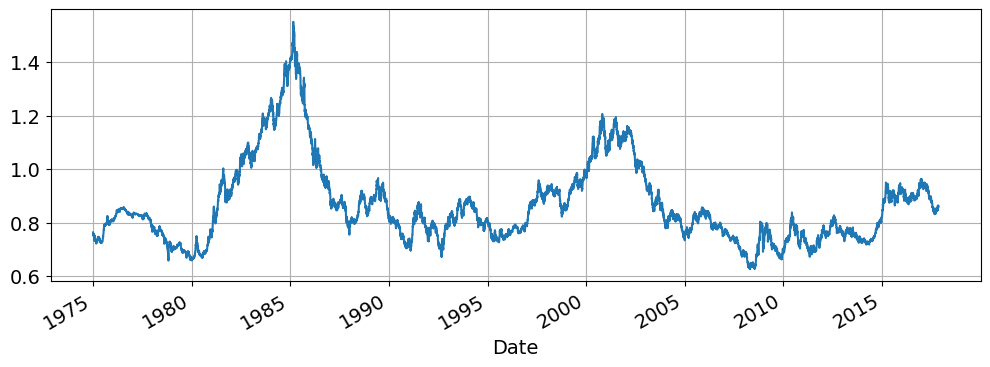

In [29]:
fx.Value.plot()
plt.show()

**Resample - fixed period average**

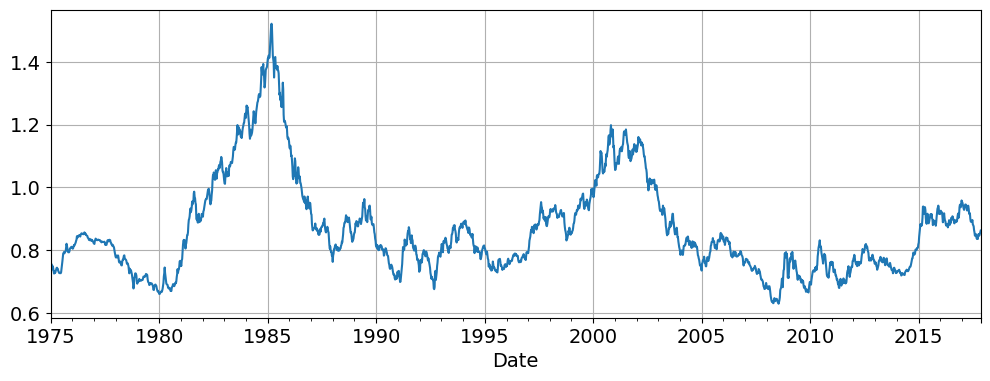

In [30]:
fxw=fx.Value.resample('W').mean()
fxw.plot()
plt.show()

### **Rolling - Rolling period average**

In [31]:
fx['roll_mean'] = fx.Value.rolling(5).mean()
fx.head(10)

,Value,roll_mean
Date,,
1975-01-02,0.7633,NaN
1975-01-03,0.7585,NaN
1975-01-06,0.7524,NaN
1975-01-07,0.7510,NaN
1975-01-08,0.7554,0.75612
1975-01-09,0.7551,0.75448
1975-01-10,0.7534,0.75346
1975-01-13,0.7540,0.75378
1975-01-14,0.7588,0.75534


<Axes: xlabel='Date'>

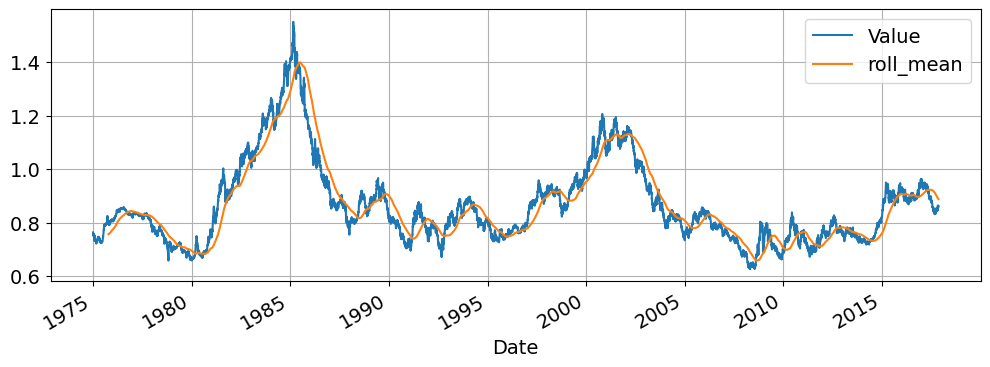

In [36]:
fx['roll_mean'] = fx.Value.rolling(200).mean()

fx[['Value','roll_mean']].plot()